In [1]:
!pip install transformers -q
!pip install sentencepiece -q

     |████████████████████████████████| 2.9 MB 5.5 MB/s 
     |████████████████████████████████| 3.3 MB 32.5 MB/s 
     |████████████████████████████████| 895 kB 35.7 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 636 kB 35.9 MB/s 
     |████████████████████████████████| 1.2 MB 5.4 MB/s 


In [5]:
import pandas as pd

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *
from plotting_helper import *

In [11]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')
IMG_PATH = '/content/drive/MyDrive/melSpectrogram'

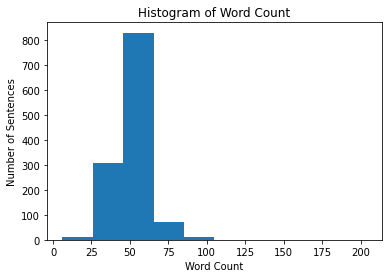

In [6]:
plot_histogram(data['Lyric'])

##### From the histogram, it is evident that most of the sentences have 50 words and some have 75. Although there are sentences with 100 words, the perecentage is very minimal. Hence maximum sequence length is considered as 75.

In [7]:
MAX_SEQ_LEN = 75
gpu, cpu = get_devices()

In [8]:
chk_point = 'bert-base-multilingual-cased'
base_model, tokenizer = load_bert_model(chk_point)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

In [9]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=MAX_SEQ_LEN)

In [12]:
txt_only_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.TXT,
                                       k_folds=2, epochs=10, balance_classes=True, dropout_level=0.1, lr=2e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=3, clip_at=1.0, img_path=IMG_PATH, hidden_dim=256)

Running Text Only Classification
FOLD 0
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 10
Training Model
Evaluating


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 0.690 / Validation : 0.655
Time for epoch : 20.446911 seconds
Epoch 2 / 10
Training Model
Evaluating
Losses - Train : 0.632 / Validation : 0.626
Time for epoch : 20.655256 seconds
Epoch 3 / 10
Training Model
Evaluating
Losses - Train : 0.605 / Validation : 0.589
Time for epoch : 20.337774 seconds
Epoch 4 / 10
Training Model
Evaluating
Losses - Train : 0.566 / Validation : 0.555
Time for epoch : 20.394786 seconds
Epoch 5 / 10
Training Model
Evaluating
Losses - Train : 0.545 / Validation : 0.569
Time for epoch : 17.719718 seconds
Epoch 6 / 10
Training Model
Evaluating
Losses - Train : 0.543 / Validation : 0.604
Time for epoch : 17.840183 seconds
Epoch 7 / 10
Training Model
Evaluating
Losses - Train : 0.550 / Validation : 0.540
Time for epoch : 20.270274 seconds
Epoch 8 / 10
Training Model
Evaluating
Losses - Train : 0.505 / Validation : 0.686
Time for epoch : 17.829024 seconds
Epoch 9 / 10
Training Model
Evaluating
Losses - Train : 0.481 / Validation : 0.521
Time for epo

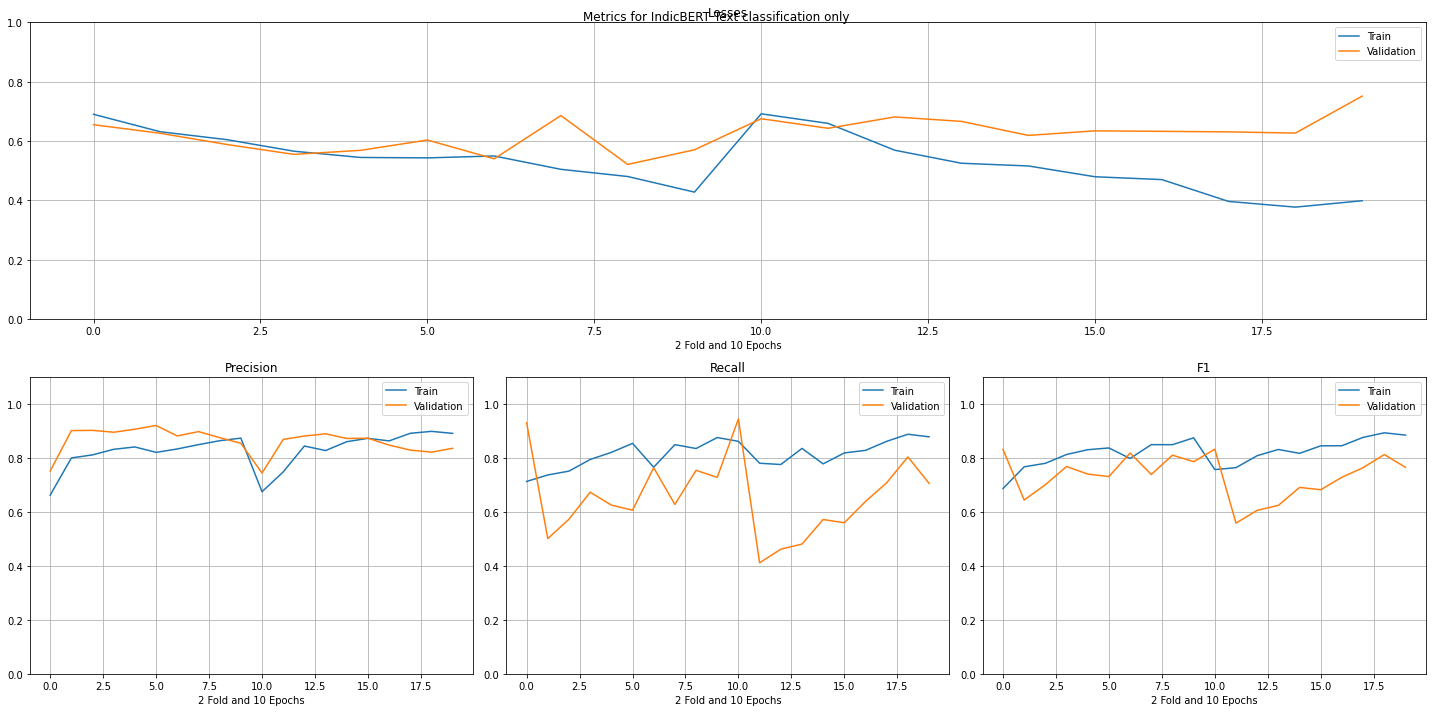

In [13]:
plot_results(txt_only_results[0], 'IndicBERT Text classification only')

In [14]:
txt_only_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_precision,train_recall,train_f1,validation_precision,validation_recall,validation_f1,train_losses,validation_losses
0,0.674766,0.861575,0.756813,0.743879,0.944976,0.832455,0.692004,0.675467
0,0.662222,0.712919,0.686636,0.751445,0.930788,0.831557,0.690366,0.655360
6,0.833333,0.765550,0.798005,0.881543,0.763723,0.818414,0.549895,0.540412
8,0.898551,0.887828,0.893157,0.821516,0.803828,0.812576,0.377611,0.627106
8,0.863861,0.834928,0.849148,0.875346,0.754177,0.810256,0.480783,0.521469
9,0.873508,0.875598,0.874552,0.854342,0.727924,0.786082,0.428185,0.570747
3,0.832080,0.794258,0.812729,0.895238,0.673031,0.768392,0.566018,0.555393
9,0.891041,0.878282,0.884615,0.835694,0.705742,0.765240,0.399102,0.751589
7,0.891358,0.861575,0.876214,0.829132,0.708134,0.763871,0.396783,0.631094
4,0.840686,0.820574,0.830508,0.906574,0.625298,0.740113,0.544956,0.568906


In [15]:
mfcc_fusion_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.MFCC,
                                       k_folds=2, epochs=10, balance_classes=True, dropout_level=0.1, lr=2e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=3, clip_at=1.0, img_path=IMG_PATH, hidden_dim=256)

Running Fusion Classification
FOLD 0
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 10
Training Model
Evaluating


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 0.701 / Validation : 0.685
Time for epoch : 20.452279 seconds
Epoch 2 / 10
Training Model
Evaluating
Losses - Train : 0.669 / Validation : 0.661
Time for epoch : 20.488172 seconds
Epoch 3 / 10
Training Model
Evaluating
Losses - Train : 0.598 / Validation : 0.648
Time for epoch : 20.645306 seconds
Epoch 4 / 10
Training Model
Evaluating
Losses - Train : 0.548 / Validation : 0.622
Time for epoch : 20.55248 seconds
Epoch 5 / 10
Training Model
Evaluating
Losses - Train : 0.535 / Validation : 0.588
Time for epoch : 20.492398 seconds
Epoch 6 / 10
Training Model
Evaluating
Losses - Train : 0.553 / Validation : 0.619
Time for epoch : 17.990448 seconds
Epoch 7 / 10
Training Model
Evaluating
Losses - Train : 0.520 / Validation : 0.607
Time for epoch : 17.930764 seconds
Epoch 8 / 10
Training Model
Evaluating
Losses - Train : 0.483 / Validation : 0.659
Time for epoch : 17.904472 seconds
Epoch 9 / 10
Training Model
Evaluating
Losses - Train : 0.455 / Validation : 0.573
Time for epoc

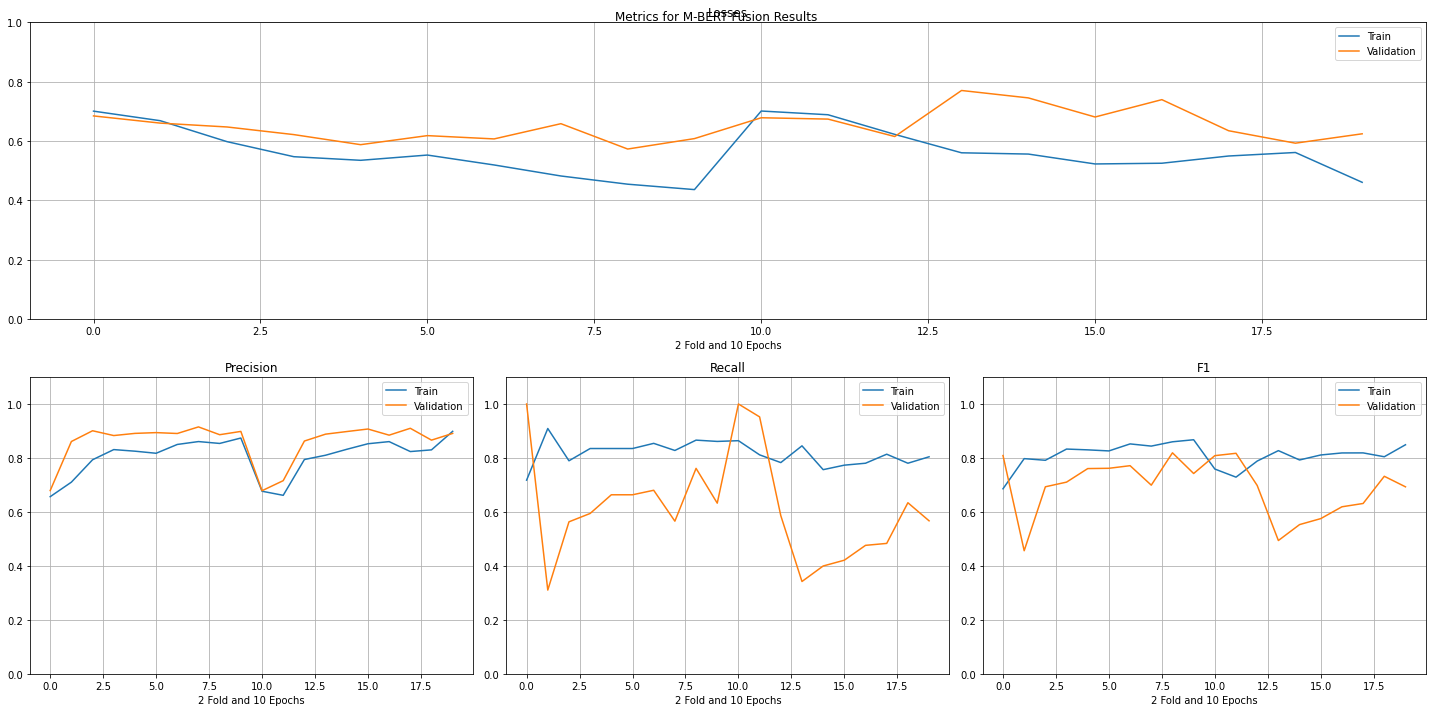

In [16]:
plot_results(mfcc_fusion_results[0],'M-BERT Fusion Results')

In [17]:
mfcc_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_precision,train_recall,train_f1,validation_precision,validation_recall,validation_f1,train_losses,validation_losses
8,0.853774,0.866029,0.859857,0.886111,0.761337,0.818999,0.454876,0.573342
1,0.661479,0.811456,0.728832,0.715827,0.952153,0.817248,0.688866,0.674236
0,0.656455,0.717703,0.685714,0.679092,1.000000,0.808880,0.701011,0.684892
0,0.676636,0.863962,0.758910,0.678571,1.000000,0.808511,0.701393,0.678734
6,0.850000,0.854067,0.852029,0.890625,0.680191,0.771313,0.519648,0.607427
5,0.817330,0.834928,0.826036,0.893891,0.663484,0.761644,0.553044,0.618504
4,0.825059,0.834928,0.829964,0.891026,0.663484,0.760602,0.535354,0.588043
9,0.873786,0.861244,0.867470,0.898305,0.632458,0.742297,0.436661,0.608503
8,0.829949,0.780430,0.804428,0.866013,0.633971,0.732044,0.561683,0.593042
3,0.830952,0.834928,0.832936,0.882979,0.594272,0.710414,0.547524,0.621963


In [18]:
mel_fusion_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.MEL,
                                       k_folds=2, epochs=10, balance_classes=True, dropout_level=0.1, lr=2e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=3, clip_at=1.0, img_path=IMG_PATH, hidden_dim=256)

Running Fusion Classification
FOLD 0
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 10
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Evaluating


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 0.697 / Validation : 0.685
Time for epoch : 326.970059 seconds
Epoch 2 / 10
Training Model
Evaluating
Losses - Train : 0.682 / Validation : 0.606
Time for epoch : 55.494774 seconds
Epoch 3 / 10
Training Model
Evaluating
Losses - Train : 0.637 / Validation : 0.573
Time for epoch : 56.392186 seconds
Epoch 4 / 10
Training Model
Evaluating
Losses - Train : 0.577 / Validation : 0.613
Time for epoch : 53.905443 seconds
Epoch 5 / 10
Training Model
Evaluating
Losses - Train : 0.581 / Validation : 0.550
Time for epoch : 57.295711 seconds
Epoch 6 / 10
Training Model
Evaluating
Losses - Train : 0.550 / Validation : 0.595
Time for epoch : 50.268928 seconds
Epoch 7 / 10
Training Model
Evaluating
Losses - Train : 0.518 / Validation : 0.521
Time for epoch : 52.708379 seconds
Epoch 8 / 10
Training Model
Evaluating
Losses - Train : 0.482 / Validation : 0.494
Time for epoch : 57.790249 seconds
Epoch 9 / 10
Training Model
Evaluating
Losses - Train : 0.456 / Validation : 0.504
Time for ep

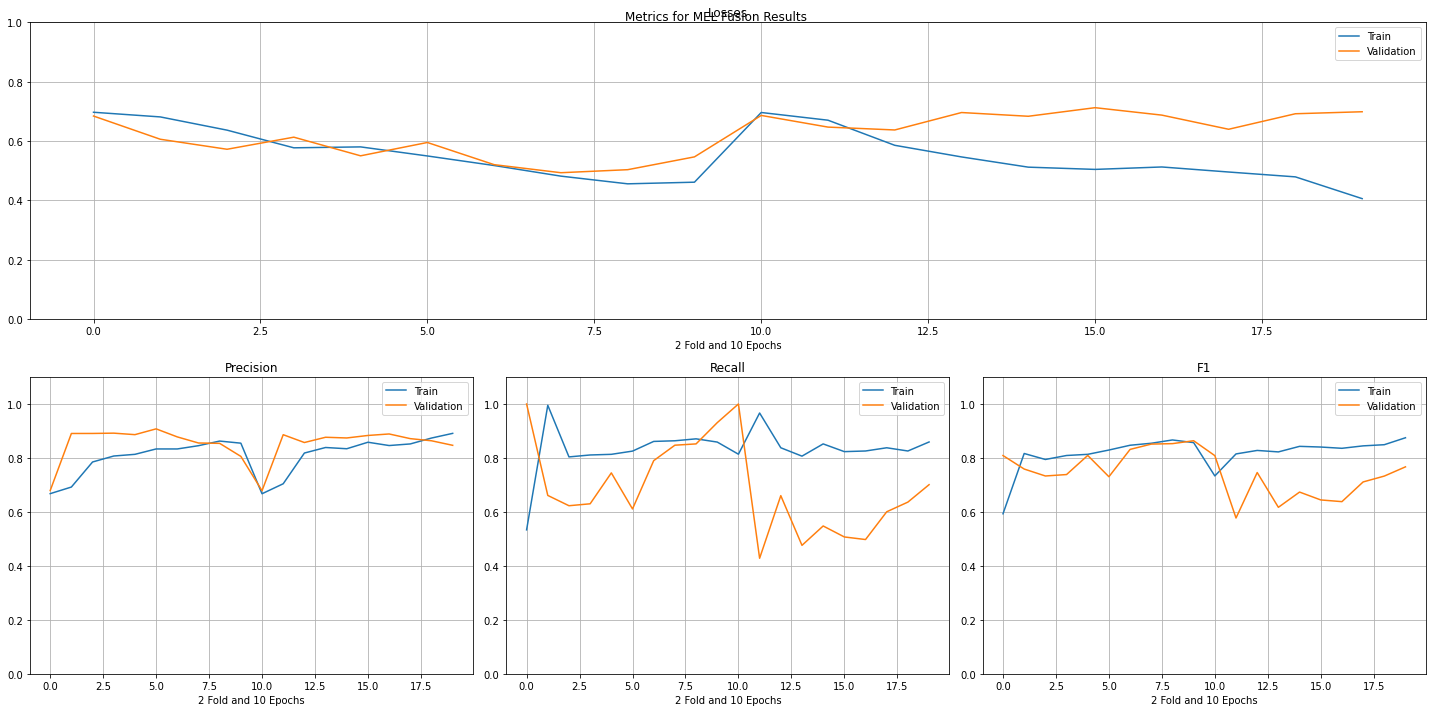

In [19]:
plot_results(mel_fusion_results[0],'MEL Fusion Results')

In [20]:
mel_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_precision,train_recall,train_f1,validation_precision,validation_recall,validation_f1,train_losses,validation_losses
9,0.854762,0.858852,0.856802,0.805785,0.930788,0.863787,0.461625,0.546905
8,0.862559,0.870813,0.866667,0.854067,0.852029,0.853047,0.456113,0.503756
7,0.845433,0.863636,0.854438,0.855422,0.847255,0.851319,0.482028,0.493544
6,0.833333,0.861244,0.847059,0.877984,0.789976,0.831658,0.517786,0.520687
4,0.813397,0.813397,0.813397,0.886364,0.744630,0.809339,0.580541,0.550487
0,0.667665,0.533493,0.593085,0.679092,1.000000,0.808880,0.697262,0.684524
0,0.667319,0.813842,0.733333,0.678571,1.000000,0.808511,0.696437,0.686553
9,0.891089,0.859189,0.874848,0.846821,0.700957,0.767016,0.406210,0.698964
1,0.692180,0.995215,0.816487,0.890675,0.661098,0.758904,0.681546,0.606308
2,0.818182,0.837709,0.827830,0.857143,0.660287,0.745946,0.585902,0.637582
